# SRAG - Agrupamento e Detecção de Anomalias

Este é um trabalho realizado para a disciplina de Sistemas de Apoio à Decisão do curso de Sistemas de Informação da Universidade Federal de Ouro Preto.

A base de dados disponibilizada pelo governo diz respeito a Casos de Síndrome Respiratória Aguda Grave Hospitalizados. Para este trabalho iremos trabalhar com uma amostragem de 1000 registros aleatórios. 

<center><img src="img/srag.jpg"></center>

A SRAG é um agravamento de infecções respiratórias. Os sintomas geralmente são febre de início súbito, mesmo que referida, acompanhada de tosse ou dor de garganta e pelo menos um dos sintomas: mialgia, cefaleia ou artralgia.

A evolução para Síndrome Respiratória Aguda acontece quando o paciente apresenta os sintomas acima e mais algum dos sintomas abaixo:

• Dispneia;

• Desconforto respiratório;

• Insuficiência respiratória;

• Saturação de oxigênio menor que 95%;

• Exacerbação de doença preexistente.

## 1.0. Importar Dados

In [3]:
# Bilioteca para análise e manipulação de dados
import pandas as pd

In [66]:
# Lendo o arquivo de amostra da base de dados
df = pd.read_csv('sample_SRAG.csv')
df.iloc[:3, :20]

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N
0,19/07/2020,30,14/07/2020,29,MG,BELO HORIZONTE,1449.0,CONTAGEM,311860,UNIDADE PRONTO ATENDIMENTO CONTAGEM,7818858,F,15/05/1944,76,3,3076,9,9.0,NaN,9.0
1,03/08/2020,32,03/08/2020,32,MG,PASSOS,1455.0,MONTE SANTO DE MINAS,314320,SANTA CASA DE MISERICORDIA DE MONTE SANTO,2146495,M,10/11/1933,86,3,3086,6,4.0,NaN,0.0
2,05/06/2020,23,02/06/2020,23,PA,01 REGIONAL DE PROTECAO SOCIAL,1484.0,BELEM,150140,UPA DAGUA I,9617868,F,02/01/1925,95,3,3095,5,4.0,NaN,1.0


## 2.0. Seleção das Features

In [38]:
# Dimensões do dataframe
# 1000 linhas e 154 colunas
df.shape

(1000, 94)

### 2.1. Exclusão de Atributos

In [67]:
# Deletar colunas irrelevantes para o trabalho
df = df.drop(['RES_IGA', 'RES_IGM', 'RES_IGG', 'DT_RES', 'OUT_SOR', 'TP_SOR', 'DT_CO_SOR', 'SOR_OUT',
             'TP_AM_SOR', 'DS_AN_OUT', 'AN_OUTRO', 'AN_ADENO', 'AN_PARA3', 'AN_PARA2', 'AN_PARA1',
             'AN_VSR', 'AN_SARS2', 'POS_AN_OUT', 'TP_FLU_AN', 'POS_AN_FLU', 'RES_AN', 'DT_RES_AN',
             'TP_TES_AN', 'DT_TOMO', 'TOMO_OUT', 'TOMO_RES', 'OBES_IMC', 'MORB_DESC', 'M_AMAMENTA',
             'HISTO_VGM', 'PAIS_VGM', 'CO_PS_VGM', 'LO_PS_VGM', 'DT_VGM', 'DT_RT_VGM', 'PCR_SARS2', 
             'PAC_COCBO', 'PAC_DSCBO', 'OUT_ANIM', 'PCR_RINO', 'PCR_OUTRO', 'DS_PCR_OUT', 'CLASSI_OUT',
             'PCR_PARA4', 'PCR_ADENO', 'PCR_METAP', 'PCR_BOCA', 'PCR_VSR', 'PCR_PARA1', 'PCR_PARA2', 
              'PCR_PARA3', 'FLUASU_OUT', 'PCR_FLUBLI', 'FLUBLI_OUT', 'POS_PCROUT', 'POS_PCRFLU', 'TP_FLU_PCR',
              'PCR_FLUASU', 'OUT_AMOST', 'DT_EVOLUCA', 'DT_ENCERRA', 'DT_DIGITA', 'DT_PCR', 'DT_COLETA',
             'DT_RAIOX', 'RAIOX_OUT', 'DT_NOTIFIC', 'DT_ENTUTI', 'DT_SAIDUTI', 'ID_UNIDADE', 'ID_REGIONA',
             'DT_SIN_PRI', 'ID_MUNICIP', 'DT_NASC', 'DT_INTERNA', 'DT_VAC_MAE', 'DT_NASC', 'AMOSTRA', 'TP_AMOSTRA', 
             'CO_REGIONA', 'CO_MUN_NOT', 'CO_UNI_NOT', 'DT_UT_DOSE', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE',
             'CS_ETINIA', 'ID_PAIS', 'CO_PAIS', 'CS_ESCOL_N', 'MAE_VAC', 'OUTRO_DES', 'SG_UF_NOT', 'ID_RG_RESI',
             'CO_RG_RESI', 'ID_MN_RESI', 'CO_MUN_RES', 'CS_ZONA', 'DT_ANTIVIR', 'TP_AMOSTRA', 'SUPORT_VEN',
             'ID_RG_INTE', 'CO_RG_INTE', 'ID_MN_INTE', 'CO_MU_INTE', 'OUT_ANTIV', 'SEM_NOT', 'TP_ANTIVIR', 
              'SEM_PRI', 'TP_IDADE', 'CS_GESTANT', 'COD_IDADE', 'PCR_RESUL', 'PCR_RESUL', 'CRITERIO'], axis=1)
df.head()

,CS_SEXO,NU_IDADE_N,CS_RACA,SG_UF,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,...,HOSPITAL,SG_UF_INTE,UTI,RAIOX_RES,CLASSI_FIN,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,F,76,9.0,MG,2.0,2.0,2.0,2.0,1.0,2.0,...,1.0,MG,NaN,NaN,5.0,NaN,2.0,2.0,2.0,2.0
1,M,86,4.0,MG,2.0,2.0,2.0,1.0,2.0,2.0,...,1.0,MG,2.0,NaN,4.0,2.0,2.0,2.0,2.0,2.0
2,F,95,4.0,PA,1.0,NaN,NaN,2.0,2.0,NaN,...,1.0,PA,2.0,4.0,5.0,2.0,NaN,NaN,NaN,NaN
3,M,54,1.0,SP,2.0,2.0,2.0,2.0,1.0,1.0,...,1.0,SP,2.0,2.0,4.0,1.0,NaN,NaN,NaN,NaN
4,F,37,NaN,PA,2.0,2.0,2.0,1.0,1.0,1.0,...,1.0,PA,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2. Dicionário de Variáveis

De acordo com a fonte dos dados, essa é a descrição de cada uma das variáveis presentes no dataset.

- CS_SEXO - Sexo do paciente
- NU_IDADE_N - Idade do Paciente
- CS_RACA - Cor ou raça do Paciente
- SG_UF - UF da residência do Paciente
- SURTO_SG - Se o caso é proveniente de SG
- NOSOCOMIAL - Caso de SRAG com infecção adquirida após internação.
- AVE_SUINO - Caso com contato direto com aves ou suínos.
- FEBRE - Se o Paciente apresentou febre
- TOSSE - Se o Paciente apresentou tosse
- GARGANTA - Se o Paciente apresentou dor de garganta
- DISPNEIA - Se o Paciente apresentou dispneia
- DESC_RESP - Se o Paciente apresentou desconforto respiratório
- SATURACAO - Se o Paciente apresentou saturação O2 < 95%
- DIARREIA - Se o Paciente apresentou diarreia
- VOMITO - Se o Paciente apresentou vômito
- DOR_ABD - Se o Paciente apresentou dor abdominal
- FADIGA - Se o Paciente apresentou fadiga
- PERD_OLFT - Se o Paciente apresentou perda de olfato
- PERD_PALA - Se o Paciente apresentou perda de paladar
- OUTRO_SIN - Se o Paciente apresentou outros sintomas
- PUERPERA - Se o Paciente era puérpera ou parturiente (mulher que pariu recentemente – até 45 dias do parto)
- FATOR_RISC - Se o Paciente apresentou algum fator de risco
- CARDIOPATI - Se o Paciente possuia Doença Cardiovascular Crônica
- HEMATOLOGI - Se o Paciente possuia Doença Hematológica Crônica
- SIND_DOWN - Se o Paciente possuia Síndrome de Down
- HEPATICA - Se o Paciente possuia Doença Hepática Crônica
- ASMA - Se o Paciente possuia asma
- DIABETES - Se o Paciente possuia diabetes
- NEUROLOGIC - Se o Paciente possuia Doença Neurológica
- PNEUMOPATI - Paciente possui outra pneumopatia crônica
- IMUNODEPRE - Se o Paciente possuia Imunodeficiência ou Imunodepressão (diminuição da função do sistema imunológico)
- RENAL - Se o Paciente possuia Doença Renal Crônica
- OBESIDADE - Se o Paciente possuia obesidade
- OUT_MORBI - Se o Paciente possuia outro fator de risco
- VACINA - Se o Paciente foi vacinado contra a gripe na última campanha
- ANTIVIRAL - Se o Paciente usou antiviral para a gripe
- HOSPITAL - Se o Paciente foi internado
- SG_UF_INTE - UF da internação do Paciente
- UTI - Se o Paciente foi internado na UTI
- RAIOX_RES - Resultado do Raio X de tórax
- CLASSI_FIN - Diagnóstico final do caso.
- EVOLUCAO - Evolução do caso 

In [13]:
# Colunas presentes no dataset
df.columns

Index(['CS_SEXO', 'NU_IDADE_N', 'CS_RACA', 'SG_UF', 'SURTO_SG', 'NOSOCOMIAL',
       'AVE_SUINO', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP',
       'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_SIN', 'PUERPERA',
       'FATOR_RISC', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA',
       'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL',
       'OBESIDADE', 'OUT_MORBI', 'VACINA', 'ANTIVIRAL', 'HOSPITAL',
       'SG_UF_INTE', 'UTI', 'RAIOX_RES', 'CLASSI_FIN', 'EVOLUCAO', 'DOR_ABD',
       'FADIGA', 'PERD_OLFT', 'PERD_PALA'],
      dtype='object')

## 3.0. Preparação dos Dados

Esta base de dados possui muitos valores faltantes, e os dados precisam ser normalizados.

### 3.1. Preenchimento de valores faltantes

In [4]:
# Contando valores NaN em todas as colunas do dataset
# Apenas as colunas CS_SEXO, NU_IDADE_N, FATOR_RISC e SG_UF_INTE não possuem valores faltantes
df.isnull().sum()

CS_SEXO         0
NU_IDADE_N      0
CS_RACA        86
SG_UF           0
SURTO_SG      163
NOSOCOMIAL    209
AVE_SUINO     187
FEBRE         118
TOSSE          87
GARGANTA      242
DISPNEIA      101
DESC_RESP     155
SATURACAO     145
DIARREIA      252
VOMITO        258
OUTRO_SIN     252
PUERPERA      610
FATOR_RISC      0
CARDIOPATI    500
HEMATOLOGI    606
SIND_DOWN     610
HEPATICA      609
ASMA          600
DIABETES      529
NEUROLOGIC    594
PNEUMOPATI    592
IMUNODEPRE    606
RENAL         595
OBESIDADE     595
OUT_MORBI     530
VACINA        209
ANTIVIRAL     132
HOSPITAL       37
SG_UF_INTE      0
UTI           156
RAIOX_RES     307
CLASSI_FIN    124
EVOLUCAO      228
DOR_ABD       722
FADIGA        720
PERD_OLFT     721
PERD_PALA     721
dtype: int64

In [68]:
# Como as colunas deste dataset representam valores categóricas, a medida de centralidade Moda será usada para
# preencher os valores faltantes
# Por fim é verificado se ainda há NaN's

# O cálculo da Moda é feito com a biblioteca statistics
import statistics as sts

df['CS_RACA'].fillna(sts.mode(df['CS_RACA']), inplace=True)

df['SURTO_SG'].fillna(sts.mode(df['SURTO_SG']), inplace=True)

df['NOSOCOMIAL'].fillna(sts.mode(df['NOSOCOMIAL']), inplace=True)

df['AVE_SUINO'].fillna(sts.mode(df['AVE_SUINO']), inplace=True)

df['FEBRE'].fillna(sts.mode(df['FEBRE']), inplace=True)

df['TOSSE'].fillna(sts.mode(df['TOSSE']), inplace=True)

df['GARGANTA'].fillna(sts.mode(df['GARGANTA']), inplace=True)

df['DISPNEIA'].fillna(sts.mode(df['DISPNEIA']), inplace=True)

df['DESC_RESP'].fillna(sts.mode(df['DESC_RESP']), inplace=True)

df['SATURACAO'].fillna(sts.mode(df['SATURACAO']), inplace=True)

df['DIARREIA'].fillna(sts.mode(df['DIARREIA']), inplace=True)

df['VOMITO'].fillna(sts.mode(df['VOMITO']), inplace=True)

df['OUTRO_SIN'].fillna(sts.mode(df['OUTRO_SIN']), inplace=True)

df['PUERPERA'].fillna(sts.mode(df['PUERPERA']), inplace=True)

df['CARDIOPATI'].fillna(sts.mode(df['CARDIOPATI']), inplace=True)

df['HEMATOLOGI'].fillna(sts.mode(df['HEMATOLOGI']), inplace=True)

df['SIND_DOWN'].fillna(sts.mode(df['SIND_DOWN']), inplace=True)

df['HEPATICA'].fillna(sts.mode(df['HEPATICA']), inplace=True)

df['ASMA'].fillna(sts.mode(df['ASMA']), inplace=True)

df['DIABETES'].fillna(sts.mode(df['DIABETES']), inplace=True)

df['NEUROLOGIC'].fillna(sts.mode(df['NEUROLOGIC']), inplace=True)

df['PNEUMOPATI'].fillna(sts.mode(df['PNEUMOPATI']), inplace=True)

df['IMUNODEPRE'].fillna(sts.mode(df['IMUNODEPRE']), inplace=True)

df['RENAL'].fillna(sts.mode(df['RENAL']), inplace=True)

df['OBESIDADE'].fillna(sts.mode(df['OBESIDADE']), inplace=True)

df['OUT_MORBI'].fillna(sts.mode(df['OUT_MORBI']), inplace=True)

df['VACINA'].fillna(sts.mode(df['VACINA']), inplace=True)

df['ANTIVIRAL'].fillna(sts.mode(df['ANTIVIRAL']), inplace=True)

df['HOSPITAL'].fillna(sts.mode(df['HOSPITAL']), inplace=True)

df['UTI'].fillna(sts.mode(df['UTI']), inplace=True)

df['RAIOX_RES'].fillna(sts.mode(df['RAIOX_RES']), inplace=True)

df['CLASSI_FIN'].fillna(sts.mode(df['CLASSI_FIN']), inplace=True)

df['EVOLUCAO'].fillna(sts.mode(df['EVOLUCAO']), inplace=True)

df['DOR_ABD'].fillna(sts.mode(df['DOR_ABD']), inplace=True)

df['FADIGA'].fillna(sts.mode(df['FADIGA']), inplace=True)

df['PERD_OLFT'].fillna(sts.mode(df['PERD_OLFT']), inplace=True)

df['PERD_PALA'].fillna(sts.mode(df['PERD_PALA']), inplace=True)

df.isnull().sum()

CS_SEXO       0
NU_IDADE_N    0
CS_RACA       0
SG_UF         0
SURTO_SG      0
NOSOCOMIAL    0
AVE_SUINO     0
FEBRE         0
TOSSE         0
GARGANTA      0
DISPNEIA      0
DESC_RESP     0
SATURACAO     0
DIARREIA      0
VOMITO        0
OUTRO_SIN     0
PUERPERA      0
FATOR_RISC    0
CARDIOPATI    0
HEMATOLOGI    0
SIND_DOWN     0
HEPATICA      0
ASMA          0
DIABETES      0
NEUROLOGIC    0
PNEUMOPATI    0
IMUNODEPRE    0
RENAL         0
OBESIDADE     0
OUT_MORBI     0
VACINA        0
ANTIVIRAL     0
HOSPITAL      0
SG_UF_INTE    0
UTI           0
RAIOX_RES     0
CLASSI_FIN    0
EVOLUCAO      0
DOR_ABD       0
FADIGA        0
PERD_OLFT     0
PERD_PALA     0
dtype: int64

### 3.2. Rotulação de Variáveis Categóricas

As colunas SG_UF_INTE, FATOR_RISC, CS_SEXO e SG_UF possuem dados textuais, e os modelos de machine learning trabalham apenas com dados numéricos. Portanto, iremos transformar os dados dessas colunas em numéricos.

In [69]:
# Função para rotular a variável categórica
from sklearn.preprocessing import LabelEncoder

# Inseriu valores numéricos na coluna, 0 para mulher e 1 para homem
df['CS_SEXO'] = LabelEncoder().fit_transform(df['CS_SEXO'])

# Inseriu valores numéricos na coluna, 0 para não e 1 para sim
df['FATOR_RISC'] = LabelEncoder().fit_transform(df['FATOR_RISC'])

# Elimina as colunas SG_UF e SG_UF_INTE e cria uma coluna para cada volor distinto delas
# Coloca 1 na coluna apropriada, ou seja, no estado de residência e internação do paciente
df = pd.get_dummies(df, columns=['SG_UF', 'SG_UF_INTE'])


### 3.3. Normalização

In [70]:
# Normalizando as colunas com a técnica MinMax
df = (df - df.min()) / (df.max() - df.min())

## 4.0. Modelos de Machine Learning

Com todos os dados preparados, iremos construir um modelo de clusterização utilizando o algoritmo K-Means.

### 4.1. Clusterização

In [71]:
# Para manipular os vetores
import numpy as np

# Para plotar gráficos
import matplotlib.pyplot as plt

# Para usar o KMeans
from sklearn.cluster import KMeans

### 4.1.1. Grupos de pacientes

In [72]:
X_pacientes = df.iloc[:, :40].copy()
X_pacientes.head()

,CS_SEXO,NU_IDADE_N,CS_RACA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,...,ANTIVIRAL,HOSPITAL,UTI,RAIOX_RES,CLASSI_FIN,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA
0,0.0,0.76,1.000,0.125,0.125,0.125,0.125,0.000,0.125,0.125,...,0.000,0.0,0.125,0.625,1.00,0.000,0.125,0.125,0.125,0.125
1,1.0,0.86,0.375,0.125,0.125,0.125,0.000,0.125,0.125,0.000,...,0.125,0.0,0.125,0.625,0.75,0.125,0.125,0.125,0.125,0.125
2,0.0,0.95,0.375,0.000,0.125,0.125,0.125,0.125,0.125,0.000,...,0.125,0.0,0.125,0.375,1.00,0.125,0.125,0.125,0.125,0.125
3,1.0,0.54,0.000,0.125,0.125,0.125,0.125,0.000,0.000,0.000,...,0.125,0.0,0.125,0.125,0.75,0.000,0.125,0.125,0.125,0.125
4,0.0,0.37,0.375,0.125,0.125,0.125,0.000,0.000,0.000,0.000,...,0.125,0.0,0.125,0.125,1.00,0.000,0.125,0.125,0.125,0.125


In [73]:
# Agrupamento com KMeans utilizando 3 clusters
cluster = KMeans(n_clusters = 3)
grupos = cluster.fit_predict(X_pacientes)
grupos

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 2, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0,
       2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0,
       2, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1,
       1, 0, 1, 1, 0, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 1, 0,
       1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1,

In [74]:
# Contagem de registros por cluster
unicos, qnt = np.unique(grupos, return_counts = True)
print(f'Grupos: {unicos}')
print(f'Quantidades de pacientes em cada grupo: {qnt}')

Grupos: [0 1 2]
Quantidades de pacientes em cada grupo: [473 407 120]


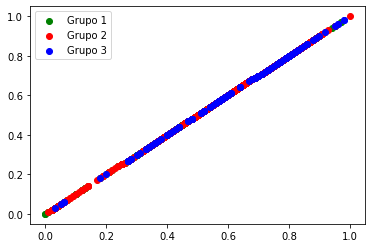

In [84]:
# Gráfico de dispersão para visualizar os clusters
x = X_pacientes.to_numpy()
plt.scatter(x[grupos == 0, 1], x[grupos == 0, 1], label='Grupo 1', c='green')
plt.scatter(x[grupos == 1, 1], x[grupos == 1, 1], label='Grupo 2', c='red')
plt.scatter(x[grupos == 2, 1], x[grupos == 2, 1], label='Grupo 3', c='blue')
plt.legend()

In [76]:
# Criação de coluna de Grupos de pacientes
X_pacientes['Cluster_pacientes'] = grupos

In [78]:
# Pacientes do grupo 0
boolArray = X_pacientes['Cluster_pacientes'] == 0
X_pacientes[boolArray].head()

,CS_SEXO,NU_IDADE_N,CS_RACA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,...,HOSPITAL,UTI,RAIOX_RES,CLASSI_FIN,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,Cluster_pacientes
1,1.0,0.86,0.375,0.125,0.125,0.125,0.000,0.125,0.125,0.0,...,0.0,0.125,0.625,0.75,0.125,0.125,0.125,0.125,0.125,0
3,1.0,0.54,0.000,0.125,0.125,0.125,0.125,0.000,0.000,0.0,...,0.0,0.125,0.125,0.75,0.000,0.125,0.125,0.125,0.125,0
5,1.0,0.52,0.000,0.000,0.125,0.125,0.125,0.000,0.000,0.0,...,0.0,0.125,0.125,0.75,0.000,0.125,0.125,0.125,0.125,0
7,1.0,0.02,0.375,0.125,0.125,0.125,0.000,0.000,0.125,0.0,...,0.0,0.125,0.625,0.75,0.000,0.125,0.125,0.125,0.125,0
9,1.0,0.60,0.375,0.125,0.125,0.125,0.000,0.000,0.125,0.0,...,0.0,0.125,0.625,1.00,0.000,0.125,0.125,0.125,0.125,0


In [80]:
# Pacientes do grupo 1
boolArray = X_pacientes['Cluster_pacientes'] == 1
X_pacientes[boolArray].head()

,CS_SEXO,NU_IDADE_N,CS_RACA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,...,HOSPITAL,UTI,RAIOX_RES,CLASSI_FIN,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,Cluster_pacientes
0,0.0,0.76,1.000,0.125,0.125,0.125,0.125,0.000,0.125,0.125,...,0.0,0.125,0.625,1.00,0.000,0.125,0.125,0.125,0.125,1
2,0.0,0.95,0.375,0.000,0.125,0.125,0.125,0.125,0.125,0.000,...,0.0,0.125,0.375,1.00,0.125,0.125,0.125,0.125,0.125,1
4,0.0,0.37,0.375,0.125,0.125,0.125,0.000,0.000,0.000,0.000,...,0.0,0.125,0.125,1.00,0.000,0.125,0.125,0.125,0.125,1
6,0.0,0.52,0.375,0.125,0.000,0.125,0.000,0.125,0.125,0.000,...,0.0,0.000,0.625,0.75,0.125,0.125,0.125,0.125,0.125,1
8,0.0,0.77,0.250,0.000,0.125,0.125,0.000,0.000,0.125,0.000,...,0.0,0.000,0.125,1.00,0.000,0.125,0.125,0.125,0.125,1


In [79]:
# Pacientes do grupo 2
boolArray = X_pacientes['Cluster_pacientes'] == 2
X_pacientes[boolArray].head()

,CS_SEXO,NU_IDADE_N,CS_RACA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,...,HOSPITAL,UTI,RAIOX_RES,CLASSI_FIN,EVOLUCAO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,Cluster_pacientes
13,0.0,0.48,1.000,1.0,1.0,1.0,0.125,0.000,0.125,0.0,...,0.0,0.125,0.125,1.00,0.0,0.125,0.125,0.125,0.125,2
16,0.0,0.48,1.000,1.0,1.0,1.0,1.000,0.000,1.000,1.0,...,0.0,0.000,1.000,1.00,0.0,0.125,0.125,0.125,0.125,2
18,0.0,0.98,0.375,1.0,1.0,1.0,0.000,0.000,0.125,0.0,...,0.0,0.125,1.000,0.75,0.0,0.125,0.125,0.125,0.125,2
20,1.0,0.28,0.375,1.0,1.0,1.0,0.125,0.125,0.125,0.0,...,0.0,0.125,0.500,1.00,0.0,0.125,0.125,0.125,0.125,2
21,0.0,0.59,1.000,1.0,1.0,1.0,0.000,0.000,1.000,0.0,...,0.0,0.125,1.000,0.75,0.0,0.125,0.125,0.125,0.125,2
